In [1]:
import pandas as pd   #to create dataframe
from sklearn import metrics
import numpy as np  # to count the values (in our case)
import seaborn as sns #Data Visualisation 
import matplotlib.pyplot as plt #creating plots

In [2]:
movie_DF=pd.read_csv('top500MoviesIMDbF.csv')

In [3]:
#Data visualization and analysis
#Statistical description of numerical columns
movie_DF.describe()

,Year of release,Watchtime,Movie Rating,Votes,Gross collection
count,500.000000,500.000000,500.00000,5.000000e+02,500.000000
mean,1992.296000,134.228000,8.33560,6.312065e+05,102.796587
std,24.895138,31.078155,0.22161,5.487540e+05,133.011078
min,1921.000000,45.000000,8.10000,2.614000e+04,0.010000
25%,1976.000000,115.000000,8.20000,1.675140e+05,8.180000
50%,1999.000000,130.500000,8.30000,5.010145e+05,67.325000
75%,2013.000000,152.000000,8.40000,9.858340e+05,125.620000
max,2023.000000,321.000000,9.30000,2.744465e+06,858.370000


In [4]:
#include other categorical columns
movie_DF.describe(include=['O']) 

,Movie Name,Director,Cast
count,500,500,500
unique,248,169,249
top,Drishyam 2,Christopher Nolan,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe..."
freq,4,14,4


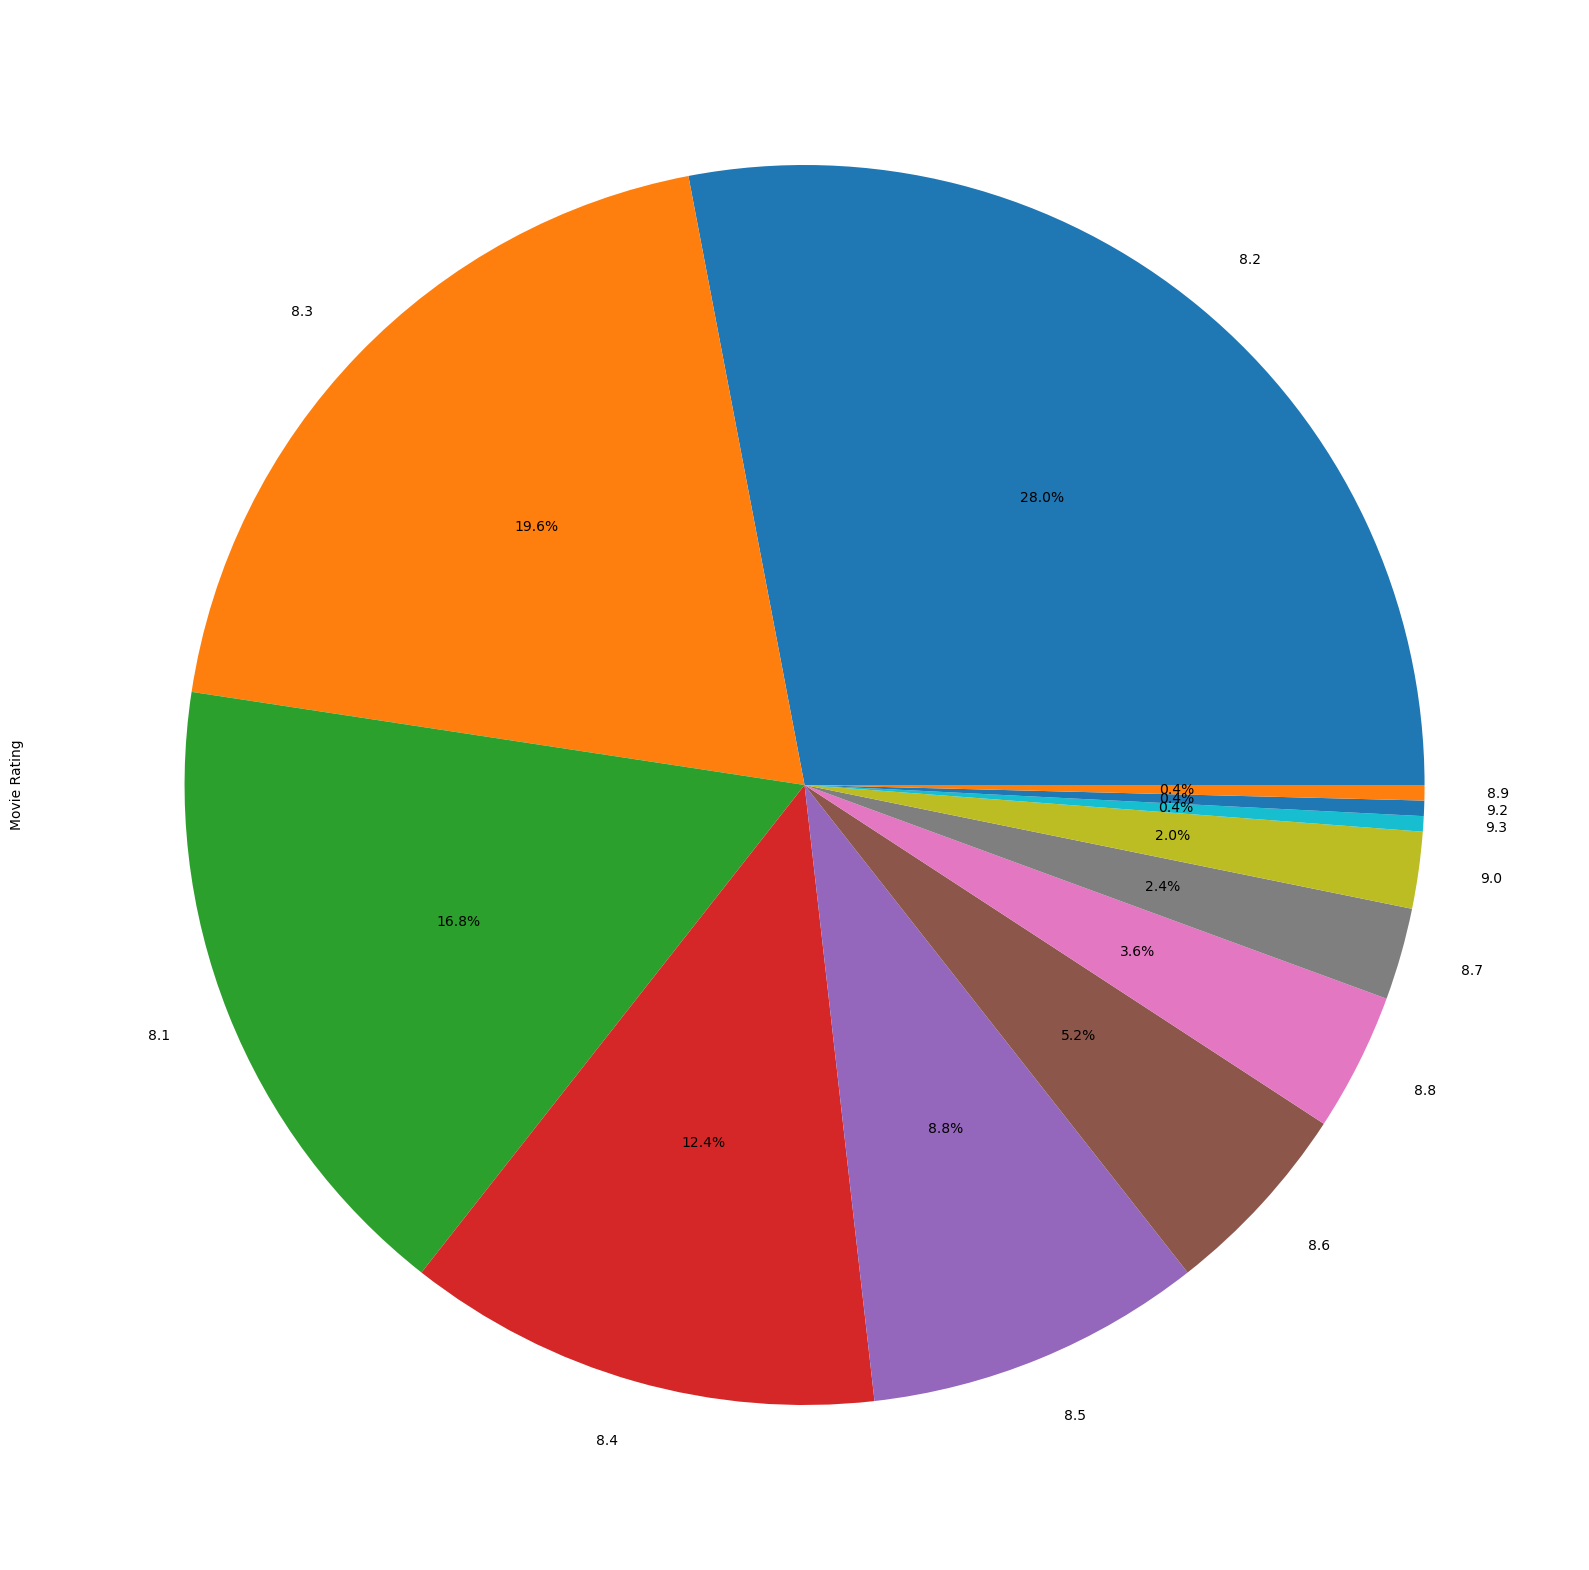

In [5]:
#distribution according to the rating
movie_DF['Movie Rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) 
plt.show()

/var/folders/7s/lk7lxhr54lq5mz8xykr5_7g00000gn/T/ipykernel_59004/1138434977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_DF['Watchtime'])


<Axes: xlabel='Watchtime', ylabel='Density'>

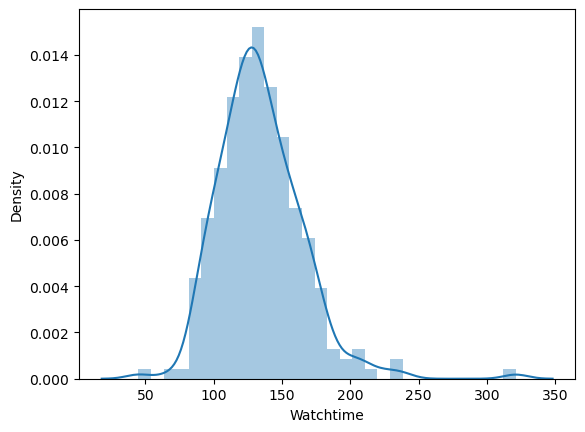

In [6]:
#Watchtime Distribution 
sns.distplot(movie_DF['Watchtime'])

/var/folders/7s/lk7lxhr54lq5mz8xykr5_7g00000gn/T/ipykernel_59004/1190038313.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_DF['Movie Rating'])


<Axes: xlabel='Movie Rating', ylabel='Density'>

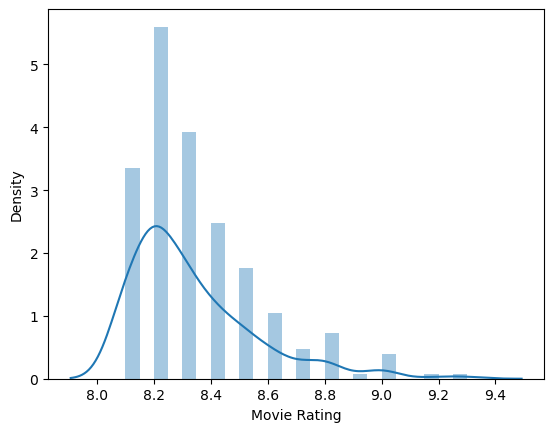

In [7]:
#Movie Rating Distribution 
sns.distplot(movie_DF['Movie Rating'])

<Figure size 3000x3000 with 0 Axes>

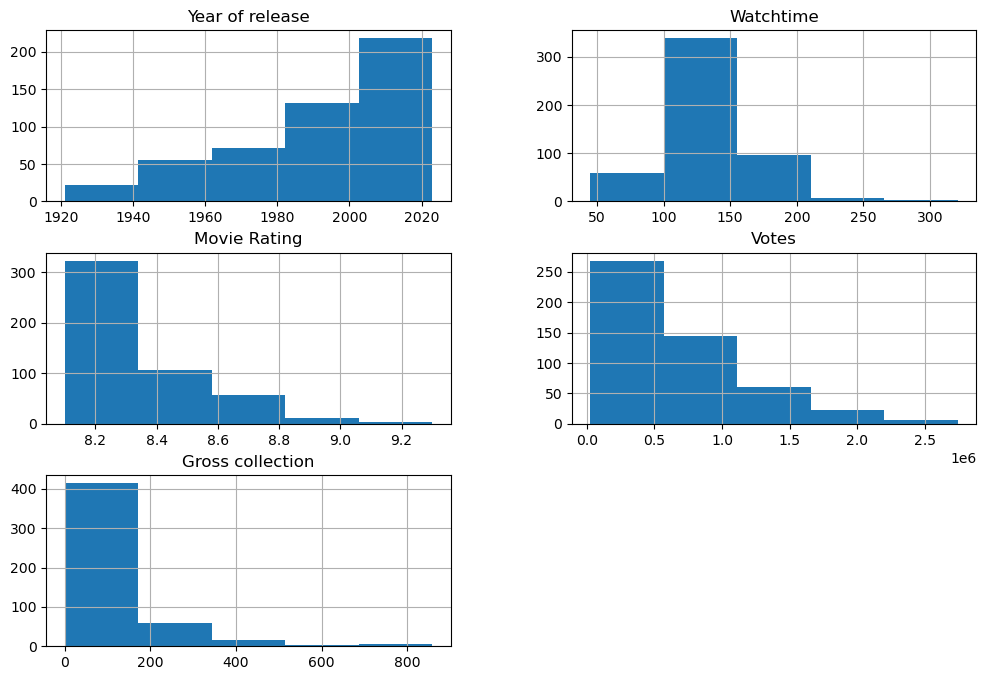

In [8]:
#distribution of numerical variables
plt.figure(figsize=(30,30))
movie_DF.hist(bins=5,figsize=(12,8));

In [9]:
#top 5 directors with highest number of movies
movie_DF['Director'].value_counts().head()

Christopher Nolan    14
Steven Spielberg     14
Akira Kurosawa       14
Martin Scorsese      14
Stanley Kubrick      12
Name: Director, dtype: int64

Text(0, 0.5, 'Number of movies')

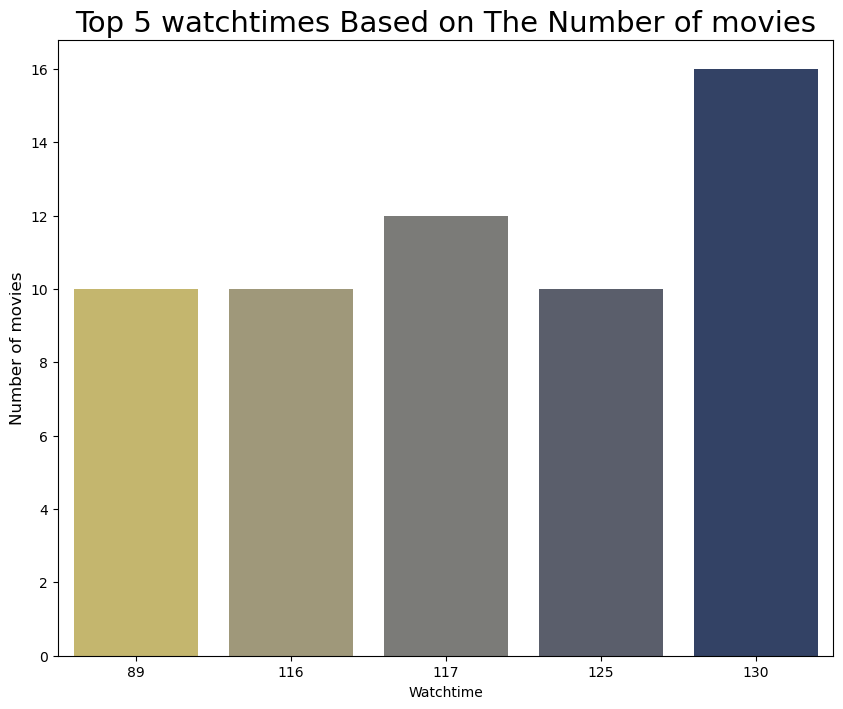

In [10]:
#top 5 watchtimes based on the number of movies
plt.figure(figsize=(10,8))
duration = movie_DF['Watchtime'].value_counts()
duration = pd.DataFrame(duration).reset_index()
duration.columns = ['Watchtime','Movie Name']
sns.barplot(x = 'Watchtime',y = 'Movie Name', data=duration.head(5), palette="cividis_r")
plt.title('Top 5 watchtimes Based on The Number of movies', fontsize=21);
plt.ylabel('Number of movies', fontsize=12)

/var/folders/7s/lk7lxhr54lq5mz8xykr5_7g00000gn/T/ipykernel_59004/1787716732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation= movie_DF.corr()


<Axes: >

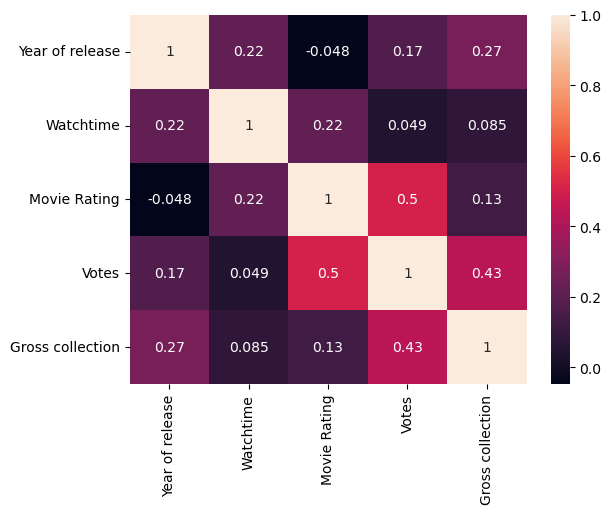

In [11]:
#Visualizing correlation 
corelation= movie_DF.corr()
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

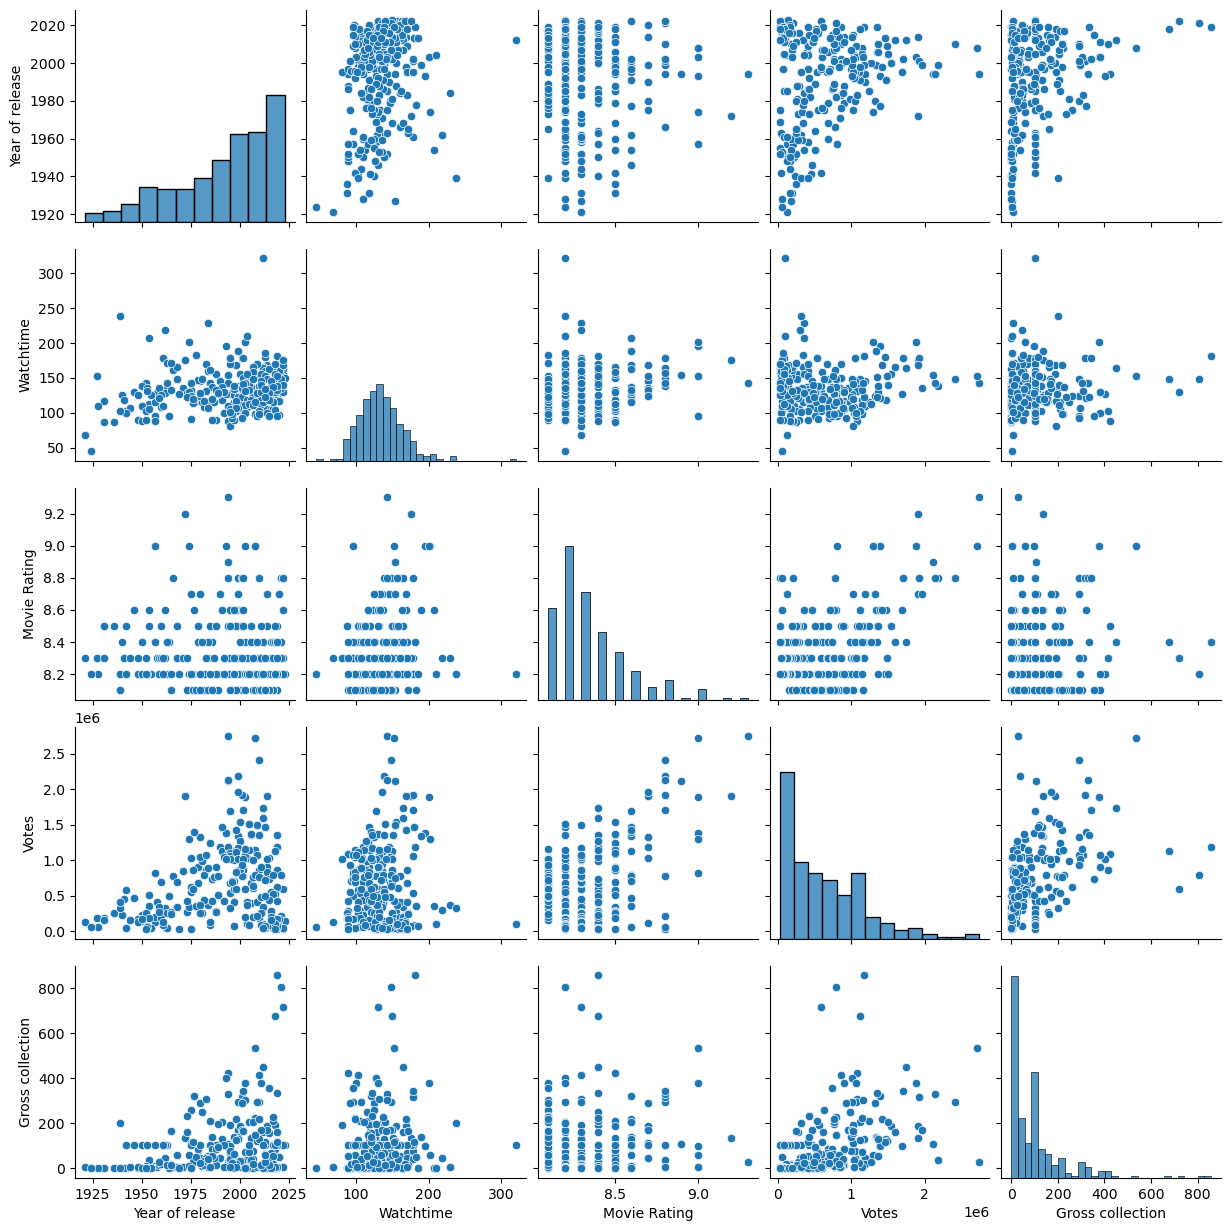

In [12]:
#Visualise relationship between each two columns
sns.pairplot(movie_DF)

<Axes: xlabel='Year of release'>

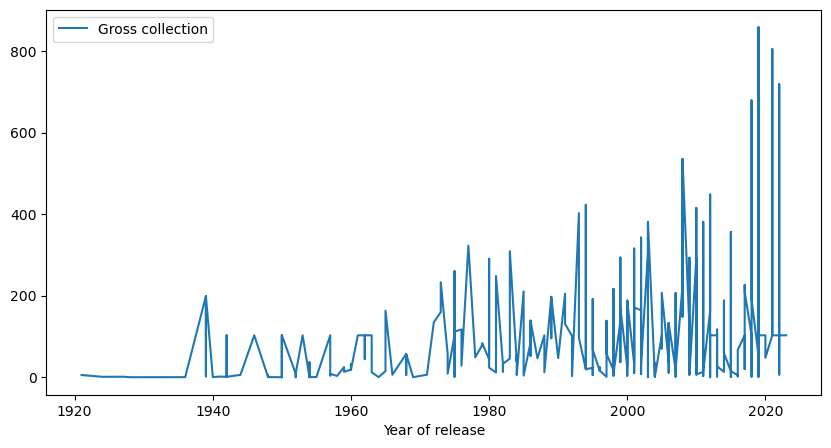

In [13]:
#change of gross collection among the years
movie_DF= movie_DF.sort_values(by='Year of release')
movie_DF.plot.line(x='Year of release', y=['Gross collection'], figsize=(10,5), grid=False)

In [14]:
#Classifier model 
# the predictors 
x=movie_DF[['Year of release', 'Watchtime', 'Votes','Gross collection']]
x.head()

,Year of release,Watchtime,Votes,Gross collection
133,1921,68,129266,5.45
383,1921,68,129266,5.45
201,1924,45,52415,0.98
451,1924,45,52415,0.98
367,1927,153,178227,1.24


In [15]:
#the response
Y = movie_DF['Movie Rating']
Y.head()

133    8.3
383    8.3
201    8.2
451    8.2
367    8.3
Name: Movie Rating, dtype: float64

In [16]:
#devide the data set into train and test sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.4, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 4)
(200, 4)
(300,)
(200,)


In [17]:
# build the the classifier (Linear Regression) model by fitting the train sets into the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
#the intercept (beta0)
print(model.intercept_)

11.411597938980869


In [19]:
#the coefficients (beta1)
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Year of release,-1.710062e-03
Watchtime,1.631540e-03
Votes,1.990781e-07
Gross collection,-1.349936e-04


In [20]:
#predict the test set 
predictions = model.predict(x_test)
predictions

array([8.34350422, 8.29512936, 8.68660133, 8.4012474 , 8.35441148,
       8.32905926, 8.31075361, 8.30417843, 8.46600648, 8.25337602,
       8.20675446, 8.18677547, 8.46614861, 8.31252569, 8.35347859,
       8.28772109, 8.22643311, 8.34804569, 8.28794763, 8.2427843 ,
       8.29226166, 8.49035217, 8.3103102 , 8.52465261, 8.2874028 ,
       8.26402226, 8.13479225, 8.28518742, 8.35347859, 8.50631481,
       8.34350422, 8.52472825, 8.29584997, 8.30417843, 8.3166904 ,
       8.39874714, 8.31075361, 8.1813581 , 8.15451865, 8.31960737,
       8.26009686, 8.26459127, 8.23164828, 8.3075843 , 8.45768625,
       8.25764584, 8.21680251, 8.16933216, 8.23903055, 8.30525762,
       8.26438288, 8.38738457, 8.28736102, 8.20516   , 8.50057104,
       8.23351689, 8.38178252, 8.40278579, 8.47378767, 8.4082499 ,
       8.42622181, 8.65824578, 8.46345011, 8.21163324, 8.69451217,
       8.26344301, 8.35808143, 8.28736102, 8.25836934, 8.26344301,
       8.39006057, 8.2005043 , 8.20042711, 8.34948764, 8.52472

(8.0, 9.5)

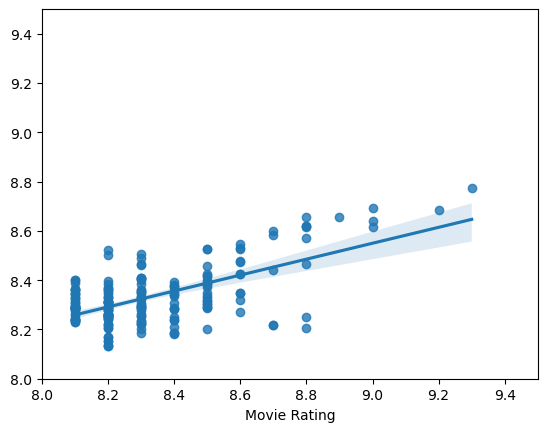

In [21]:
# now compare the predicted test with the actual test response by plotting them
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_test,y=predictions)
plt.xlim(8, 9.5)
plt.ylim(8, 9.5)

In [22]:
#Mean Absolute Error
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
#Mean Squared Error
print ('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 0.14214464427116003
MSE: 0.031610877891042374


In [23]:
#RMSE (root mean squared error)
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.17779448217265453

In [24]:
# NULL MODEL
    
    
# calculate the mean of the movie rating
average_rating = movie_DF['Movie Rating'].mean()



# number of rows 
num_rows = movie_DF.shape[0]



# create an array of size num_rows, and all the indexes will be the average_rating
null_model_predictions = [average_rating]*num_rows

# calculate the RMSE of the null model
np.sqrt(metrics.mean_squared_error(movie_DF['Movie Rating'], null_model_predictions))

0.22138798522051753

We beat the null model!

# Q1- Is there a positive relationship between the Movie Rating and the Gross collection? 

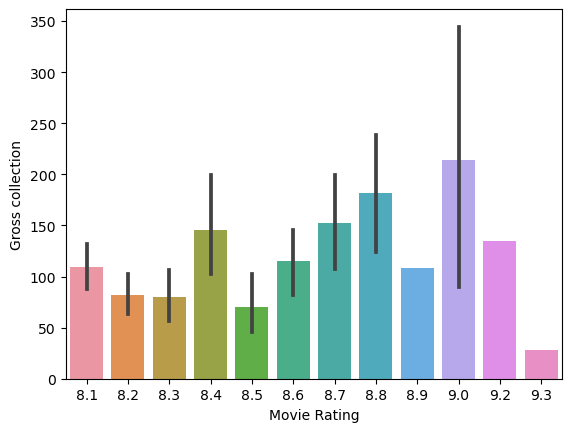

In [26]:
sns.barplot(x='Movie Rating', y='Gross collection', data=movie_DF)
plt.show()

There is no positive relationship between the “Gross collection” and “Movie Rating” columns. Since some movies with high rating had low revenue and vice versa. 

# Q2- does year of release affect the Movie Rating?

Text(0, 0.5, 'Movie Rating')

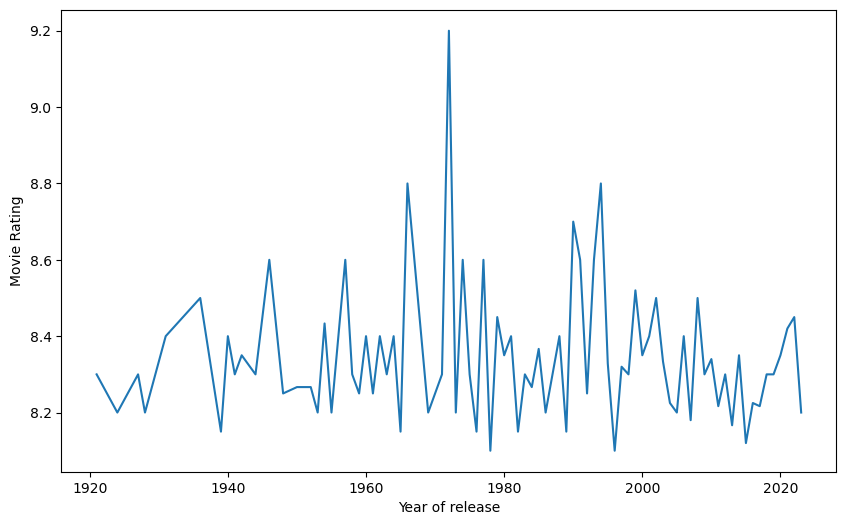

In [27]:
average_gross = movie_DF.groupby('Year of release')['Movie Rating'].mean()
plt.figure(figsize=(10,6))
average_gross.plot()
plt.ylabel('Movie Rating')

Yes, based on the chart there is a difference between the highest rating in the mid 70's and the lowest 
rating in 80s, which indicates that the year may have an affect on the movie ratings.

# Q3- does year of release affect the Gross collection?

Text(0, 0.5, 'Gross collection')

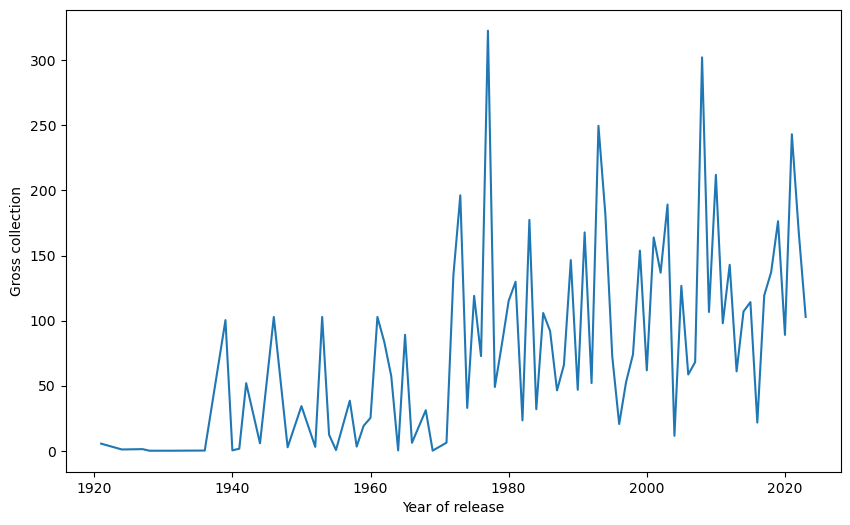

In [28]:
average_gross = movie_DF.groupby('Year of release')['Gross collection'].mean()
plt.figure(figsize=(10,6))
average_gross.plot()
plt.ylabel('Gross collection')

Yes, there is a high fluctuation in the revenew across the the years 1970's and the 2010's from around 0 revenw to up 300

# Q4- What is the top 5 directors based on movie rating?

In [31]:
top5= movie_DF.sort_values(by='Movie Rating', ascending=False)[['Movie Rating', 'Director']].head(9)
top5

,Movie Rating,Director
250,9.3,Frank Darabont
0,9.3,Frank Darabont
1,9.2,Francis Ford Coppola
251,9.2,Francis Ford Coppola
2,9.0,Christopher Nolan
252,9.0,Christopher Nolan
254,9.0,Francis Ford Coppola
255,9.0,Sidney Lumet
253,9.0,Steven Spielberg


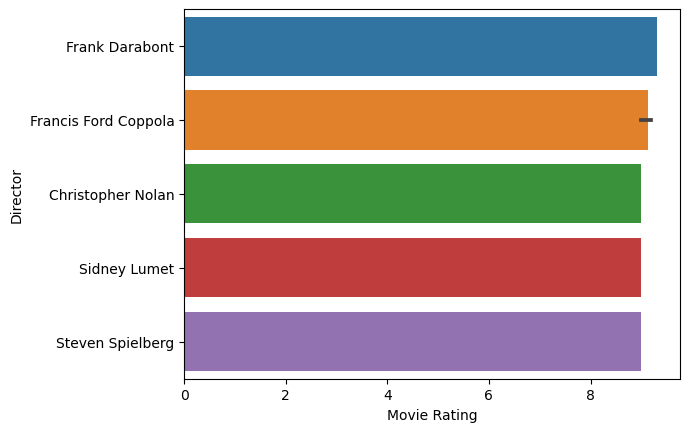

In [32]:
sns.barplot(x='Movie Rating', y='Director', data=top5)

plt.show()

based on the chart we see the top directors have 9 rating and above with the hiest being 9.3

# Q5- Does the watch time have an effect on the movie rating?

Text(0, 0.5, 'Watchtime')

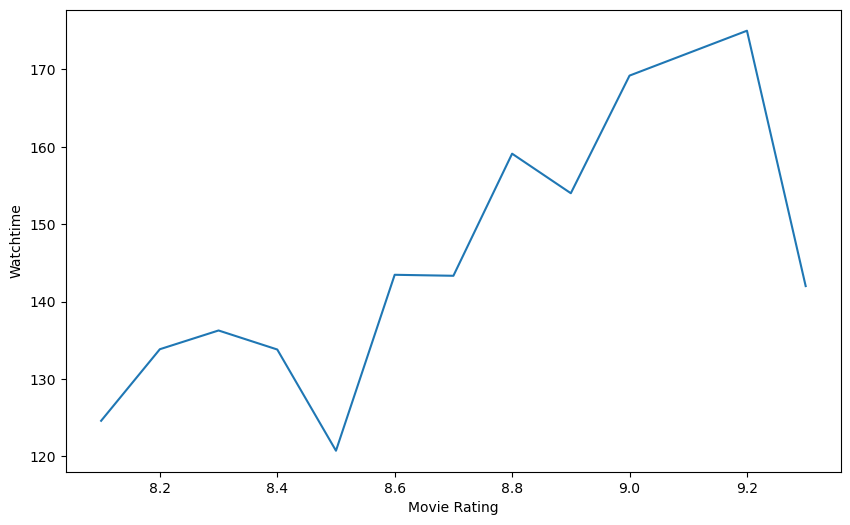

In [34]:
average_gross = movie_DF.groupby('Movie Rating')['Watchtime'].mean()
plt.figure(figsize=(10,6))
average_gross.plot()
plt.ylabel('Watchtime')

We cannot say that the watch time clearly affects the movie rating since some movies had high rating and low watch time, and others had also high rating with much lower watch time. 

# Q6- What is the top 8 movie rating?

In [35]:
top8= movie_DF.sort_values(by='Movie Rating', ascending=False)[['Movie Name', 'Movie Rating']].head(15)
top8

,Movie Name,Movie Rating
250,The Shawshank Redemption,9.3
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
251,The Godfather,9.2
2,The Dark Knight,9.0
252,The Dark Knight,9.0
254,The Godfather Part II,9.0
255,12 Angry Men,9.0
253,Schindler's List,9.0
6,The Lord of the Rings: The Return of the King,9.0


<Axes: xlabel='Movie Rating', ylabel='Movie Name'>

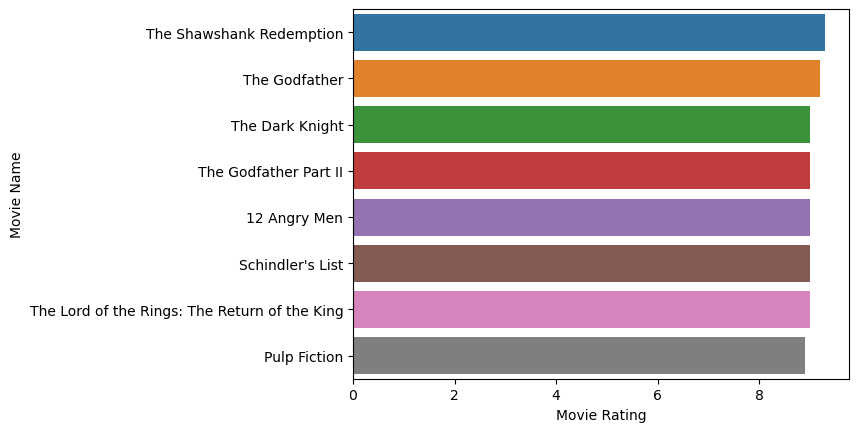

In [36]:
sns.barplot(x='Movie Rating',y='Movie Name',data=top8)

based on the chart we see the top movies have 8.9 rating and above with the hiest being 9.3

In [37]:
movie_DF.groupby("Director").size()

Director
Abhishek Pathak       2
Aditya Dhar           2
Akira Kurosawa       14
Alfred Hitchcock     10
Andrew Stanton        2
                     ..
William Friedkin      2
Wolfgang Petersen     2
Yasujirô Ozu          2
Zoya Akhtar           2
Çagan Irmak           2
Length: 169, dtype: int64

In [38]:
movie_DF["Year of release"].value_counts().mean()

6.024096385542169

# Q7- How many movies are produce annually?

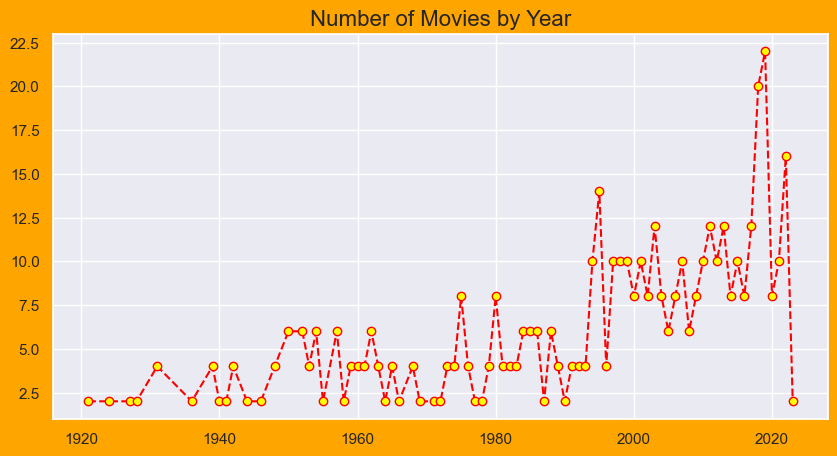

In [42]:
years = movie_DF['Year of release'].value_counts().sort_index()

plt.figure(facecolor = "orange",figsize = (10,5))
plt.plot(years.index, 
         years.values,
         marker = "o", 
         color = "red", 
         linestyle = "--",
         markerfacecolor = "yellow")
plt.title("Number of Movies by Year", fontsize = 16)
plt.show()

The graph shows that the number of released movies is increasing by years, and on average, 6.02 movies were produced each year.